## 🧪 1. Introduction: Electrons vs. Photons in LArTPCs

**Electrons**:

* Produce continuous tracks with possible bremsstrahlung-induced sub-tracks.
* Typically result in a single, uninterrupted trajectory.

**Photons**:

* Interact via Compton scattering or pair production.
* At energies around 10 MeV, there's approximately a 50/50 chance between the two interactions.
* Pair production leads to a characteristic "V" shape from the electron-positron pair.
* Compton scattering results in a single electron recoil, with the photon potentially undergoing further interactions.

---

## 📁 2. Data Structure Overview

The dataset is organized as follows:

In [22]:

Tracks/
├── LAr/
│   ├── electrons/
│   │   ├── E0000100/
│   │   ├── E0001000/
│   │   └── ...
│   └── photons/
│       ├── E0000100/
│       ├── E0001000/
│       └── ...

SyntaxError: invalid character '├' (U+251C) (3187270549.py, line 2)

Each energy folder (e.g., `E0001000` for 1 MeV) contains:

* `.npz` files: Raw track data with 3D positions and charge information.
* `.pickle` files: Metadata with ground truth information like origin, direction, and interaction type.

---

## 🛠️ 3. Setup and Imports

In [ ]:
import os
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from Gampy.tools import tracks_tools

---

## 📥 4. Loading a single Track

In [ ]:
# Specify the particle type and energy
particle = 'electrons'  # or 'photons'
energy_folder = 'E0001000'  # Example: 1 MeV

# Construct the path to the track files
base_path = f'../example_data/{particle}/{energy_folder}'
track_file = glob.glob(os.path.join(base_path, 'TrackE*.npz'))[0]

# Remove the '.npz' extension for loading
track_file_base = track_file.rstrip('.npz')

# Initialize the Track object
track = tracks_tools.Tracks(track_file_base)

Reading tracks in TrackE0001000_D20250527_T1337070955.npz


---

## 🔍 5. Exploring Track Attributes

In [ ]:
# Access raw data and truth information
positions = track.raw['r'].T  # Shape: (N, 3)
charges = track.raw['num_e']  # Shape: (N,)
truth = track.truth

# Display basic information
print(f"Number of points: {len(positions)}")
print(f"Total deposited charge: {charges.sum():.1f} e⁻")
print(f"True origin: {truth['origin']}")
print(f"Initial direction: {truth['initial_direction']}")

Number of points: 12392
Total deposited charge: 29876.0 e⁻
True origin: [0. 0. 0.]
Initial direction: [ 0.47545556 -0.31154127  0.82272963]


---

## 🎨 6. Visualizing the Raw Track in 3D

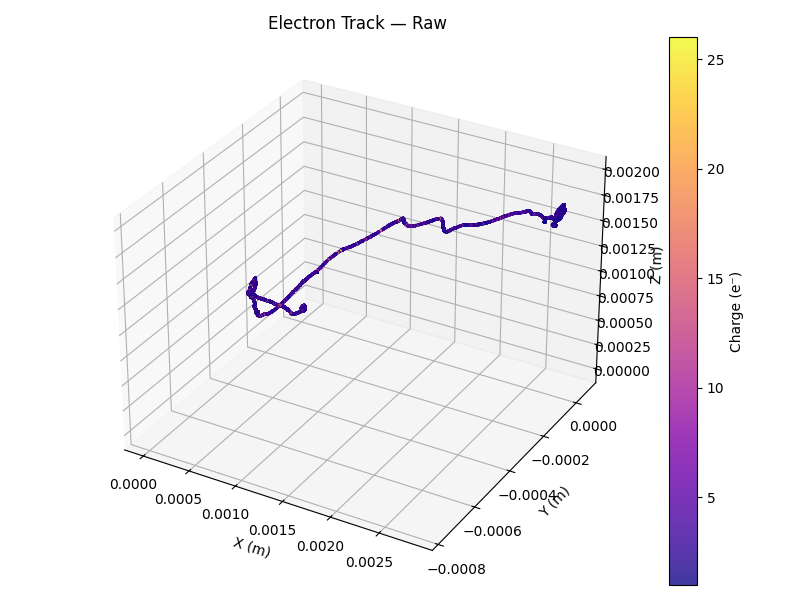

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
                c=charges, cmap='plasma', s=2, alpha=0.8)

ax.set_title("Electron Track — Raw")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()

---
⚠️ Repeat the above for electrons/photons and all available energies, and vary the track index. 
Ideally, plot and save many figures.  

---

## 🌬️ 7. Simulating Charge Drift and Diffusion

To simulate realistic detector conditions, apply drift and diffusion:([pympler.readthedocs.io][1])

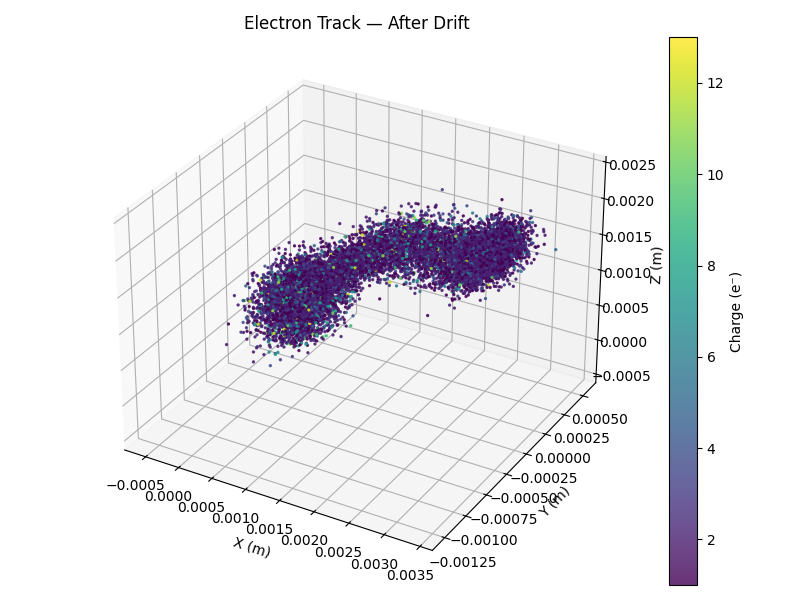

In [ ]:
# Apply drift to simulate electron movement towards the anode
track.apply_drift()

# Visualize the drifted track
drifted_positions = track.drifted['r'].T
drifted_charges = track.drifted['num_e']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(drifted_positions[:, 0], drifted_positions[:, 1], drifted_positions[:, 2],
                c=drifted_charges, cmap='viridis', s=2, alpha=0.8)

ax.set_title("Electron Track — After Drift")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()

---

## 📡 8. Simulating Detector Readout (this is what the detector will see) 

Simulate the detector's response to the drifted charge:

dict_keys(['samples_triggered', 'r_triggered', 'samples_raw', 'r_raw'])


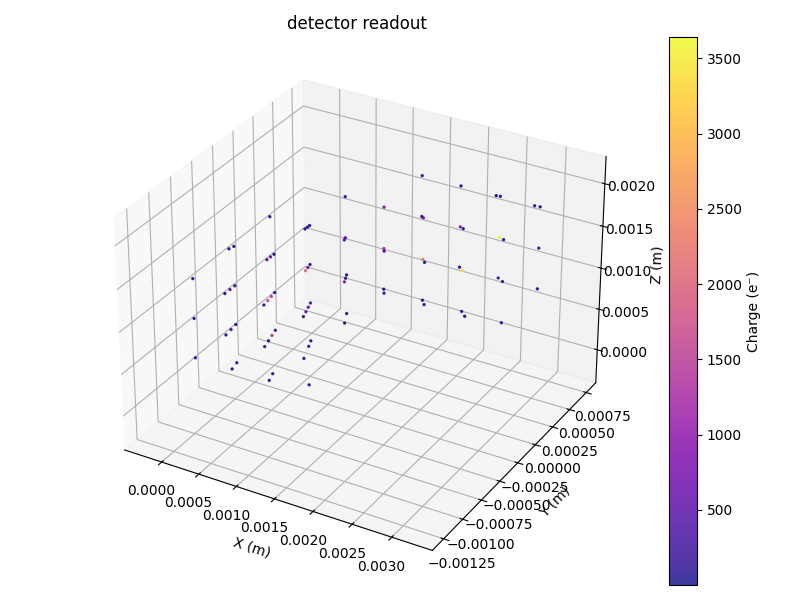

In [ ]:
# Simulate the readout process
track.readout_charge()
"""
# Access pixel samples (e.g., for GAMPixG readout)

sim_charges = track.raw['num_e']
pixel_pos = track.raw['r'].T
# pixel_pos = track.pixel_samples['r_triggered']

# Visualize the readout (example for 2D projection)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pixel_pos[:, 0], pixel_pos[:, 1], pixel_pos[:, 2],
                c=sim_charges, cmap='inferno', s=5, alpha=0.8)

ax.set_title("Detector Readout — 2D Projection")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()




# Simulate the readout process
track.readout_charge()

# Access pixel samples (e.g., for GAMPixG readout)
pixel_samples = track.pixel_samples

# Visualize the readout (example for 2D projection)
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(pixel_samples['x'], pixel_samples['y'],
                c=pixel_samples['charge'], cmap='inferno', s=5, alpha=0.8)

ax.set_title("Detector Readout — 2D Projection")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()


"""


print(track.pixel_samples.keys())
positions = track.pixel_samples['r_raw'].T  # Shape: (N, 3)
charges = track.pixel_samples['samples_raw']  # Shape: (N,)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
                c=charges, cmap='plasma', s=2, alpha=0.8)

ax.set_title("detector readout")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()


---

## 🧠 9. Comparative Analysis: Electrons vs. Photons

To compare electron and photon tracks:

Reading tracks in TrackE0001000_D20250527_T1337070955.npz
Reading tracks in TrackE0001000_D20250527_T1332135227.npz


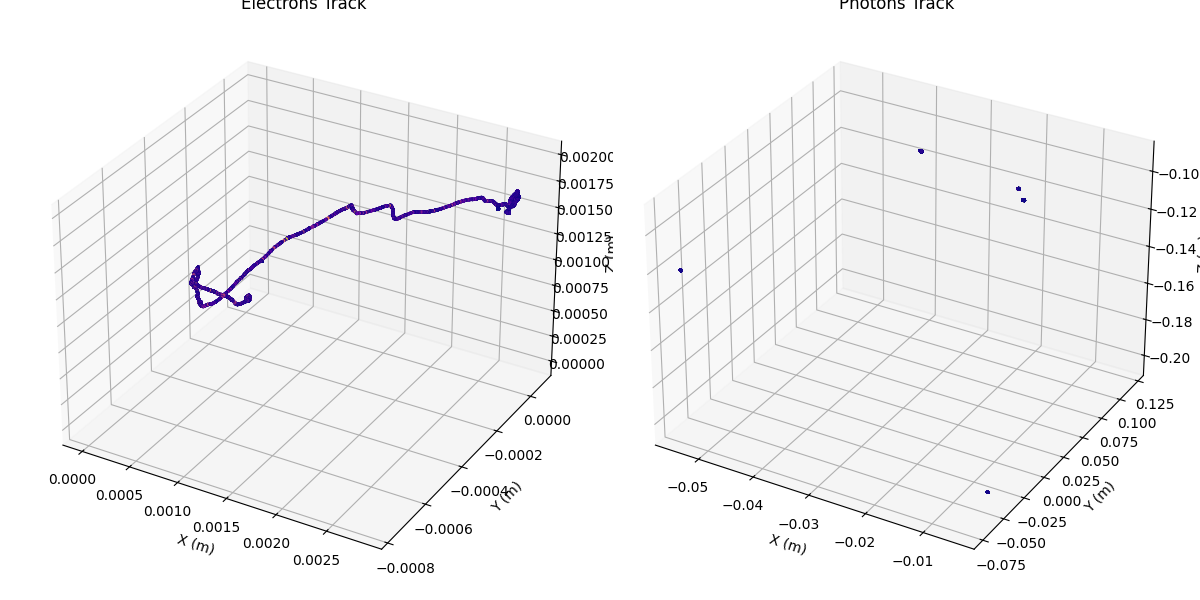

In [13]:
particles = ['electrons', 'photons']
energy_folder = 'E0001000'  # 1 MeV
track_num = 0

fig = plt.figure(figsize=(12, 6))

for i, particle in enumerate(particles):
    base_path = f'../example_data/{particle}/{energy_folder}'
    track_file = glob.glob(os.path.join(base_path, 'TrackE*.npz'))[track_num]
    track_file_base = track_file.rstrip('.npz')
    track = tracks_tools.Tracks(track_file_base)
    positions = track.raw['r'].T
    charges = track.raw['num_e']

    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
               c=charges, cmap='plasma', s=2, alpha=0.8)
    ax.set_title(f"{particle.capitalize()} Track")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_zlabel("Z (m)")

plt.tight_layout()
plt.show()

**Observations**:

* **Electron Track**: Continuous with possible minor branches due to bremsstrahlung.
* **Photon Track**: May exhibit a "V" shape from pair production or multiple segments from Compton scattering.

---

## Quest:
Find and save a 3D image of:
- a neat, single electron track
- an electron track that exibited bremsstralung and created subtracks all around (we don't like these)
- A neat pair interaction, highly symmetric
- A weird looking pair interaction

Reading tracks in TrackE0003000_D20250527_T1337352087.npz


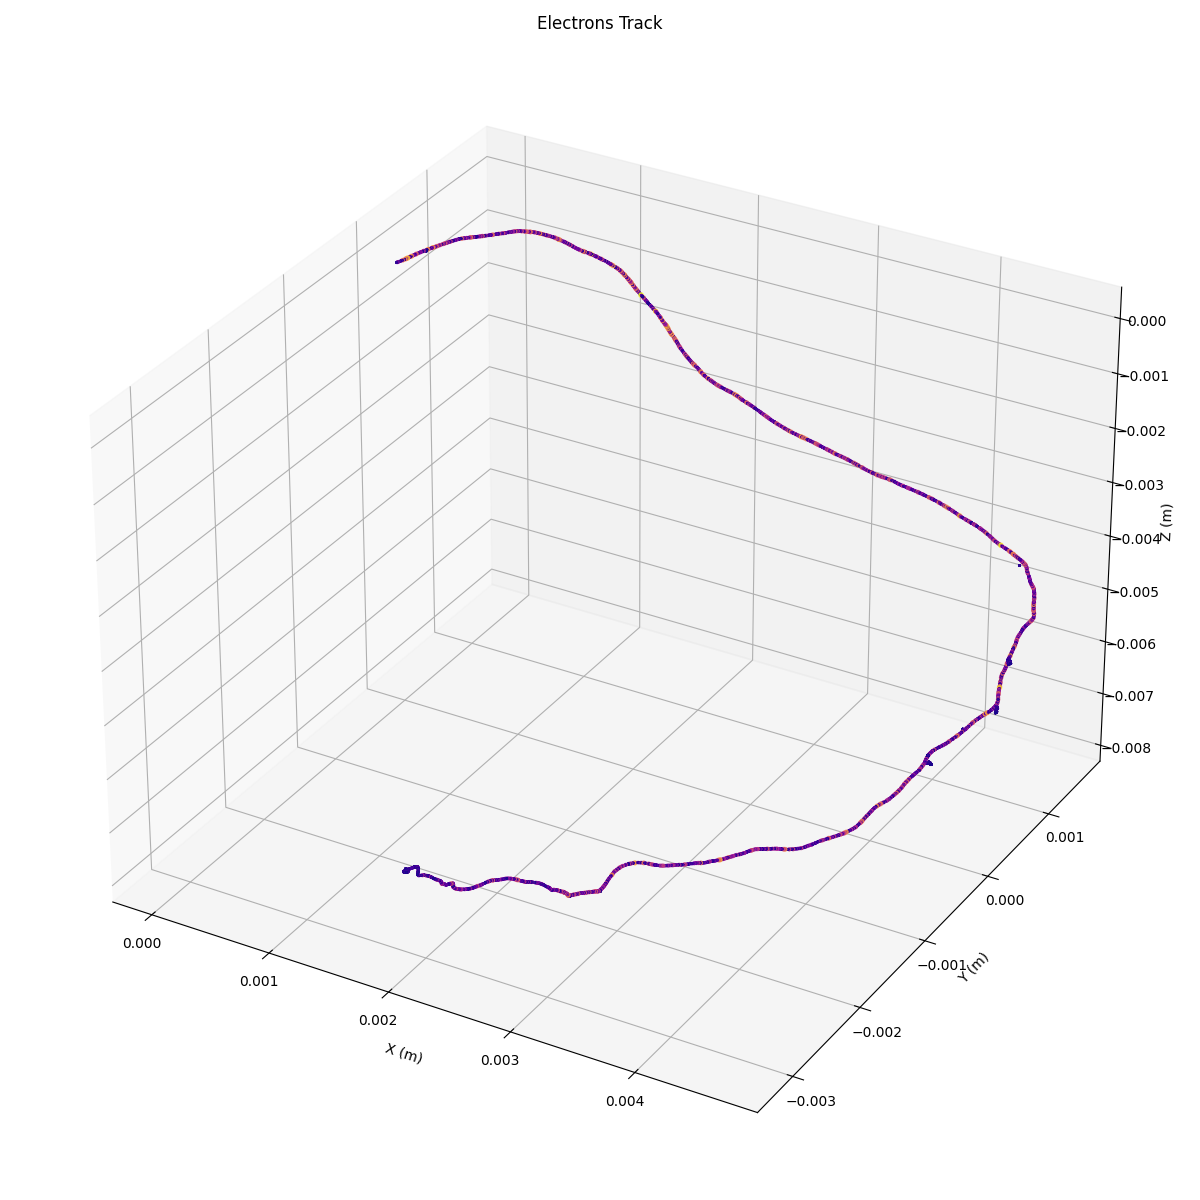

In [64]:
particles = ['electrons', 'photons']
energy_folder = 'E0003000'  # 3 MeV
track_num = 7

%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#fig = plt.figure()#figsize=(12, 6))
#ax = Axes3D(fig)

i = 0
particle = particles[0]
base_path = f'../example_data/{particle}/{energy_folder}'
track_file = glob.glob(os.path.join(base_path, 'TrackE*.npz'))[track_num]
track_file_base = track_file.rstrip('.npz')
track = tracks_tools.Tracks(track_file_base)
positions = track.raw['r'].T
charges = track.raw['num_e']

# ax = fig.add_subplot(1, 2, i + 1, projection='3d')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))
plot_thing = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
            c=charges, cmap='plasma', s=0.3 * charges, alpha=0.8)
ax.set_title(f"{particle.capitalize()} Track")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

plt.tight_layout()
plt.show()

In [63]:
import glob
import os
import numpy as np
import plotly.graph_objects as go

particles = ['electrons', 'photons']
energy_folder = 'E0005000'  # 5 MeV
track_num = 8

# Choose particle
particle = particles[0]
base_path = f'../example_data/{particle}/{energy_folder}'
track_file = glob.glob(os.path.join(base_path, 'TrackE*.npz'))[track_num]
track_file_base = track_file.rstrip('.npz')

# Load track
track = tracks_tools.Tracks(track_file_base)
positions = track.raw['r'].T  # Shape: (N, 3)
charges = track.raw['num_e']  # Length N

# Plotly 3D scatter
fig = go.Figure(data=[go.Scatter3d(
    x=positions[:, 0],
    y=positions[:, 1],
    z=positions[:, 2],
    mode='markers',
    marker=dict(
        size=0.5*charges,
        color=charges,
        colorscale='Viridis',
        opacity=1.0,
        colorbar=dict(title='Charge'),
    )
)])

fig.update_layout(
    title=f"{particle.capitalize()} Track",
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Reading tracks in TrackE0005000_D20250527_T1337831275.npz
